In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [72]:
# To add your own Drive Run this cell.
# from google.colab import drive
# drive.mount('/content/drive')

In [73]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.oneLayerNetwork = torch.nn.Linear(784, 3)
       
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.oneLayerNetwork(x)
        ### ========== TODO : END ========== ###
        return outputs

In [74]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.fc1 = torch.nn.Linear(784,400)
        self.fc2 = torch.nn.Linear(400,3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        
        outputs = torch.sigmoid(self.fc1(x))
        outputs = self.fc2(outputs)
        
        ### ========== TODO : END ========== ###
        return outputs

In [75]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [76]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [77]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [78]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [79]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            y_pred = model.forward(batch_X)
            model.zero_grad()
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step()
            
            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075398 | train acc 0.453333 | valid loss 1.084938 | valid acc 0.453333 |
| epoch  2 | train loss 1.021364 | train acc 0.566667 | valid loss 1.031102 | valid acc 0.553333 |
| epoch  3 | train loss 0.972648 | train acc 0.630000 | valid loss 0.982742 | valid acc 0.593333 |
| epoch  4 | train loss 0.928398 | train acc 0.710000 | valid loss 0.938953 | valid acc 0.640000 |
| epoch  5 | train loss 0.887963 | train acc 0.783333 | valid loss 0.899045 | valid acc 0.700000 |
| epoch  6 | train loss 0.850839 | train acc 0.826667 | valid loss 0.862485 | valid acc 0.753333 |
| epoch  7 | train loss 0.816627 | train acc 0.850000 | valid loss 0.828852 | valid acc 0.793333 |
| epoch  8 | train loss 0.785000 | train acc 0.886667 | valid loss 0.797807 | valid acc 0.846667 |
| epoch  9 | train loss 0.755688 | train acc 0.900000 | valid loss 0.769067 | valid acc 0.866667 |
| epoch 10 | train loss 0.728461 

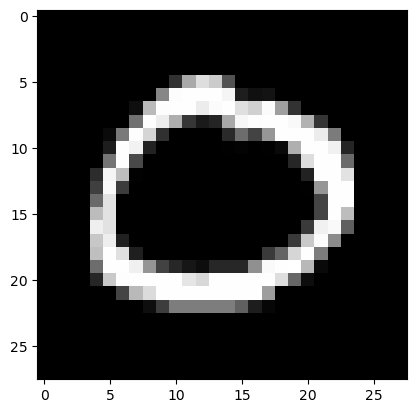

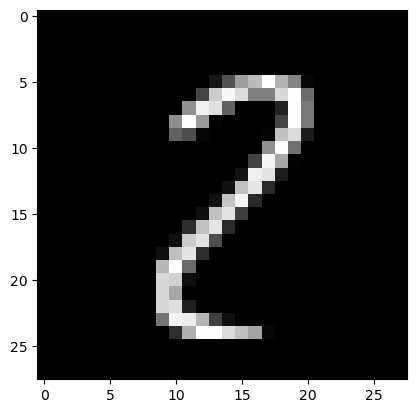

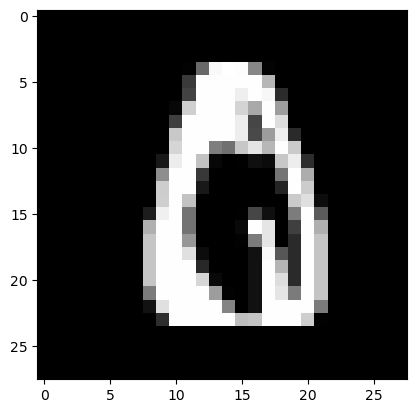

In [83]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== TODO : START ========== ###
data_directory_path =  ""
### ========== TODO : END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== TODO : START ========== ###
### part a: print out three training images with different labels

plot_img(X_train[72])
plot_img(X_train[24])
plot_img(X_train[84])

### ========== TODO : END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== TODO : START ========== ###
### part b: convert numpy arrays to tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_valid = torch.from_numpy(X_valid).float()
y_valid = torch.from_numpy(y_valid).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_loader = DataLoader(TensorDataset(X_train,y_train), batch_size=10)
valid_loader = DataLoader(TensorDataset(X_valid,y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test,y_test), batch_size=10)



### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

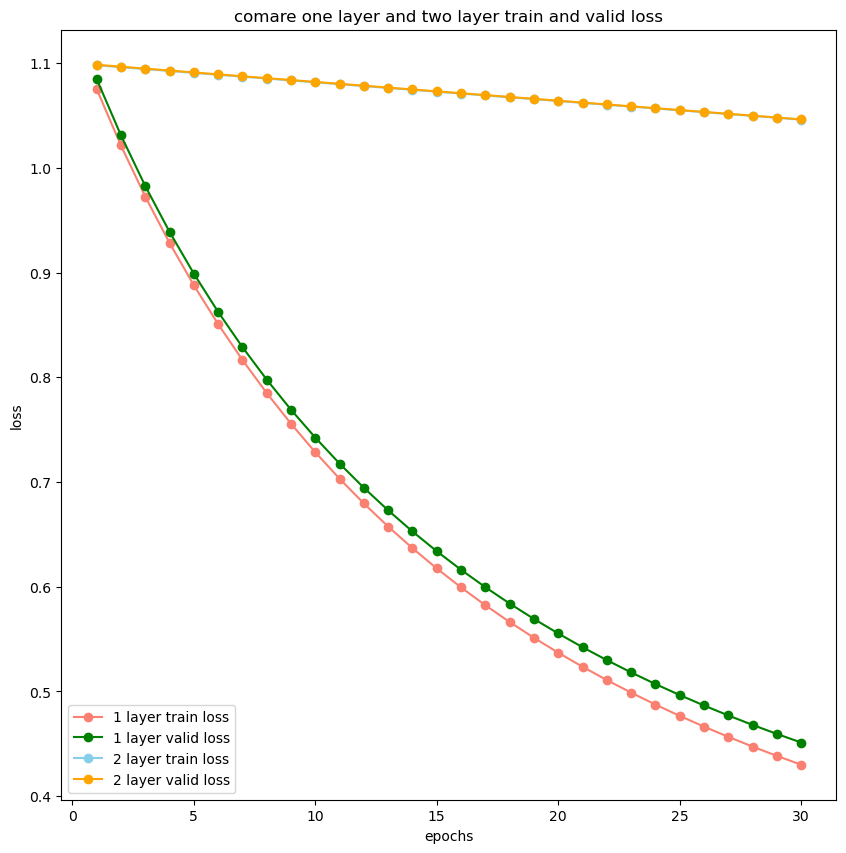

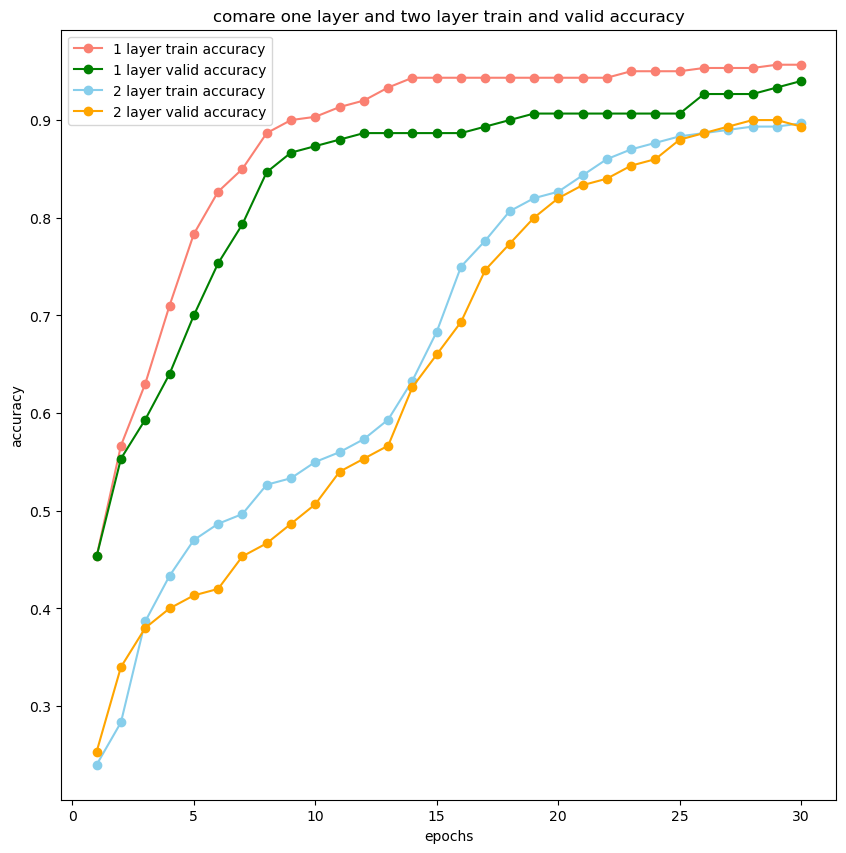

test accuracy of one layer network:  tensor(0.9600)
test accuracy of two layer network:  tensor(0.9000)
Start training OneLayerNetwork...
| epoch  1 | train loss 0.652176 | train acc 0.930000 | valid loss 0.643495 | valid acc 0.900000 |
| epoch  2 | train loss 0.448845 | train acc 0.960000 | valid loss 0.450156 | valid acc 0.953333 |
| epoch  3 | train loss 0.340191 | train acc 0.970000 | valid loss 0.347157 | valid acc 0.953333 |
| epoch  4 | train loss 0.275654 | train acc 0.976667 | valid loss 0.286565 | valid acc 0.953333 |
| epoch  5 | train loss 0.233069 | train acc 0.976667 | valid loss 0.247042 | valid acc 0.953333 |
| epoch  6 | train loss 0.202674 | train acc 0.976667 | valid loss 0.219164 | valid acc 0.960000 |
| epoch  7 | train loss 0.179708 | train acc 0.976667 | valid loss 0.198359 | valid acc 0.960000 |
| epoch  8 | train loss 0.161607 | train acc 0.980000 | valid loss 0.182174 | valid acc 0.960000 |
| epoch  9 | train loss 0.146879 | train acc 0.980000 | valid loss 0.1

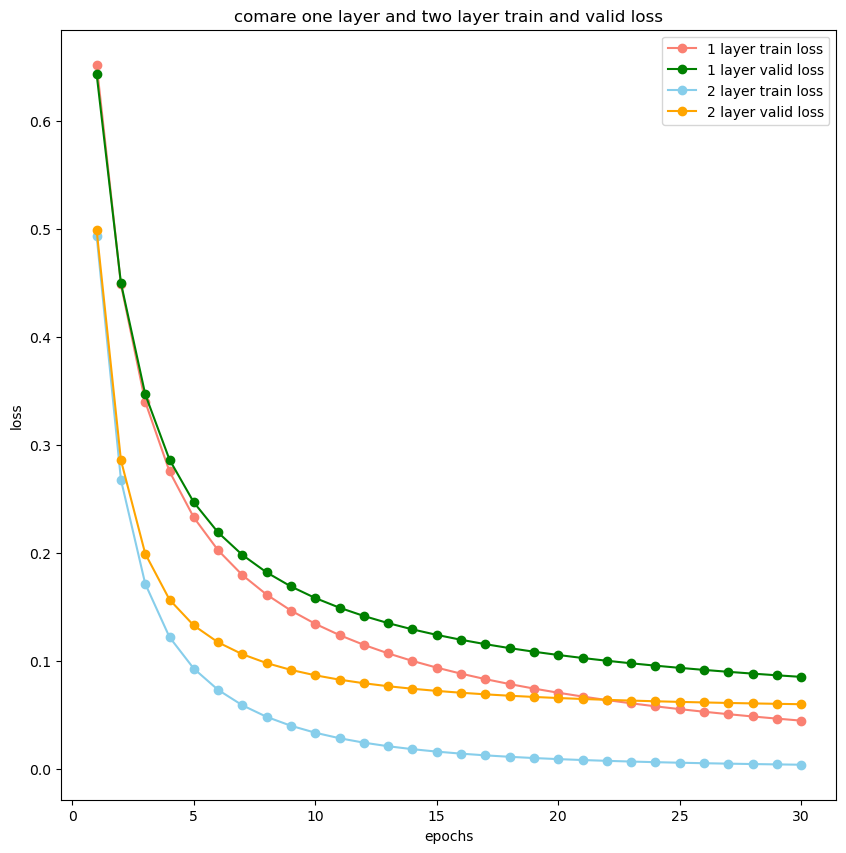

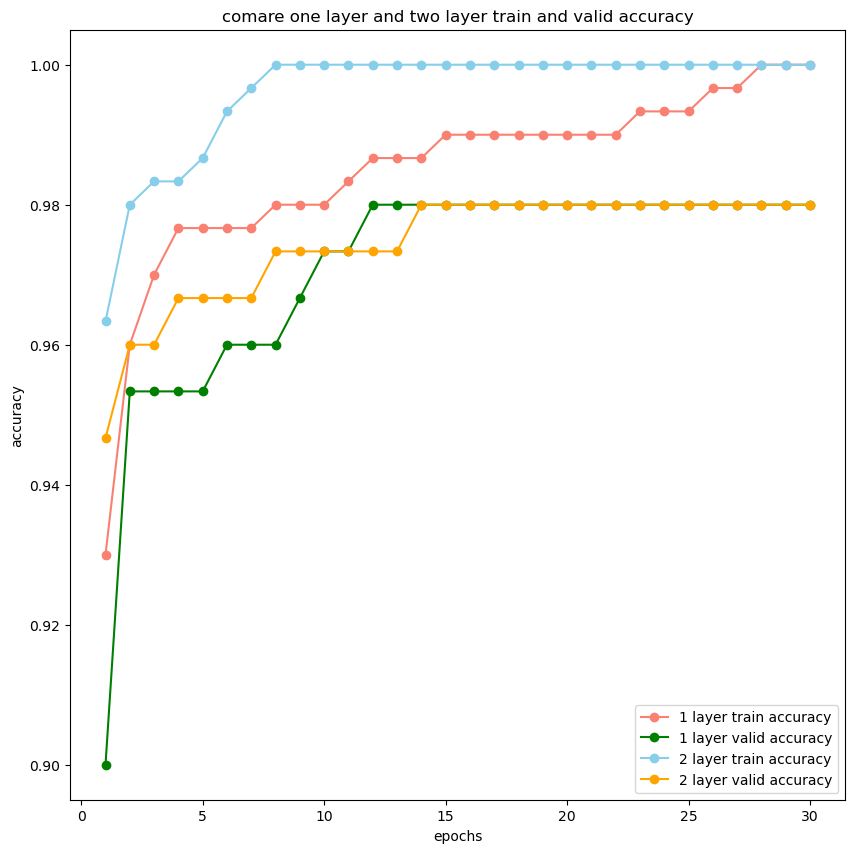

test accuracy of one layer network:  tensor(0.9733)
test accuracy of two layer network:  tensor(0.9667)


In [86]:

### ========== TODO : START ========== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_loss, color='salmon', label='1 layer train loss', marker='o')
plt.plot(epochs, one_valid_loss, color='green', label='1 layer valid loss', marker='o')
plt.plot(epochs, two_train_loss, color='skyblue', label='2 layer train loss', marker='o')
plt.plot(epochs, two_valid_loss, color='orange', label='2 layer valid loss', marker='o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('comare one layer and two layer train and valid loss')
plt.legend()
plt.show()


### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_acc, color='salmon', label='1 layer train accuracy', marker='o')
plt.plot(epochs, one_valid_acc, color='green', label='1 layer valid accuracy', marker='o')
plt.plot(epochs, two_train_acc, color='skyblue', label='2 layer train accuracy', marker='o')
plt.plot(epochs, two_valid_acc, color='orange', label='2 layer valid accuracy', marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('comare one layer and two layer train and valid accuracy')
plt.legend()
plt.show()



### ========== TODO : END ========== ##

### ========== TODO : START ========== ###
### part k: calculate the test accuracy
print("test accuracy of one layer network: ", evaluate_acc(model_one, test_loader))
print("test accuracy of two layer network: ", evaluate_acc(model_two, test_loader))



### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== TODO : END ========== ###
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two


epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_loss, color='salmon', label='1 layer train loss', marker='o')
plt.plot(epochs, one_valid_loss, color='green', label='1 layer valid loss', marker='o')
plt.plot(epochs, two_train_loss, color='skyblue', label='2 layer train loss', marker='o')
plt.plot(epochs, two_valid_loss, color='orange', label='2 layer valid loss', marker='o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('comare one layer and two layer train and valid loss')
plt.legend()
plt.show()

epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_acc, color='salmon', label='1 layer train accuracy', marker='o')
plt.plot(epochs, one_valid_acc, color='green', label='1 layer valid accuracy', marker='o')
plt.plot(epochs, two_train_acc, color='skyblue', label='2 layer train accuracy', marker='o')
plt.plot(epochs, two_valid_acc, color='orange', label='2 layer valid accuracy', marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('comare one layer and two layer train and valid accuracy')
plt.legend()
plt.show()


print("test accuracy of one layer network: ", evaluate_acc(model_one, test_loader))
print("test accuracy of two layer network: ", evaluate_acc(model_two, test_loader))

